# Joining incongruent layers

In [19]:
import geopandas as gpd 
from shapely.geometry import Polygon, box
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
from helpers import nz

>Overlay map of NZ with a grid. Calculate the population in each grid from the regional population data

>Create a regular 100 x 100 km grid that covers the extent of nz

In [20]:
bounds = nz.total_bounds
crs = nz.crs
res = int(1e5)

>Calculate grid dimensions

In [21]:
xmin, ymin, xmax, ymax = bounds
cols = list(range(int(np.floor(xmin)), int(np.ceil(xmax+res)), res))
rows = list(range(int(np.floor(ymin)), int(np.ceil(ymax + res)), res))
rows.reverse()

>Create a polygon for each cell

In [22]:
polygons = [] 
for x in cols: 
    for y in rows: 
        polygons.append(
            Polygon([(x,y), (x+res,y), 
                        (x+res,y-res), (x, y-res)])
        )

>Convert to dataframe and trim to the extent

In [23]:
grid = gpd.GeoDataFrame({'geometry':polygons}, crs=crs)
sel = grid.intersects(box(*bounds))
grid = grid[sel]
grid['id'] = grid.index
print(grid)

                                              geometry   id
0    POLYGON ((1090143 6248536, 1190143 6248536, 11...    0
1    POLYGON ((1090143 6148536, 1190143 6148536, 11...    1
2    POLYGON ((1090143 6048536, 1190143 6048536, 11...    2
3    POLYGON ((1090143 5948536, 1190143 5948536, 11...    3
4    POLYGON ((1090143 5848536, 1190143 5848536, 11...    4
..                                                 ...  ...
154  POLYGON ((1990143 5248536, 2090143 5248536, 20...  154
155  POLYGON ((1990143 5148536, 2090143 5148536, 20...  155
156  POLYGON ((1990143 5048536, 2090143 5048536, 20...  156
157  POLYGON ((1990143 4948536, 2090143 4948536, 20...  157
158  POLYGON ((1990143 4848536, 2090143 4848536, 20...  158

[150 rows x 2 columns]


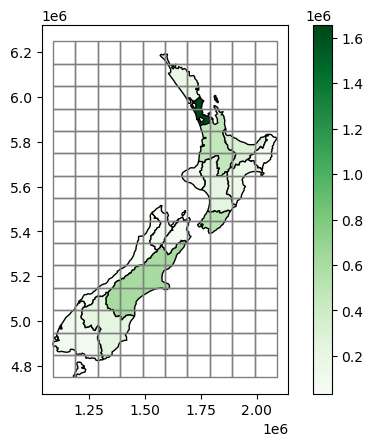

In [24]:
ax = nz.plot(
    column='Population', 
    edgecolor='k', 
    legend=True, 
    cmap='Greens'
)
grid.plot(ax=ax, color='none', edgecolor='grey');

>Calculate the weighted average for each cell based on the underlying population of each region

In [25]:
nz["area"] = nz.area

In [26]:
nz_grid = nz.overlay(grid)

In [27]:
nz_grid = nz_grid[["id", "area", "Population", "geometry"]]
nz_grid

,id,area,Population,geometry
0,64,1.289058e+10,175500.0,"POLYGON ((1586362.965 6168009.001, 1568216.708..."
1,80,1.289058e+10,175500.0,"POLYGON ((1590143 6162776.641, 1590143 6191701..."
2,81,1.289058e+10,175500.0,"POLYGON ((1633099.964 6066188.094, 1632333.259..."
3,82,1.289058e+10,175500.0,"POLYGON ((1688395.37 5989681.201, 1677965.696 ..."
4,97,1.289058e+10,175500.0,"POLYGON ((1698281.254 6113546.125, 1698221.399..."
...,...,...,...,...
105,87,1.046485e+10,46200.0,"MULTIPOLYGON (((1649908.695 5455398.241, 16565..."
106,88,1.046485e+10,46200.0,"POLYGON ((1679241.14 5359477.533, 1667754.211 ..."
107,89,1.046485e+10,46200.0,"POLYGON ((1641283.955 5341361.167, 1638347.722..."
108,103,1.046485e+10,46200.0,"POLYGON ((1690724.332 5458875.452, 1698889.134..."


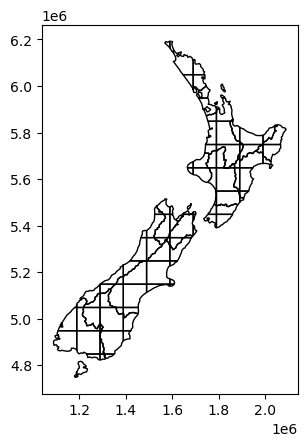

In [28]:
nz_grid.plot(color='none', edgecolor='k');

>Caculate the areas of the intersections

In [29]:
nz_grid["area_sub"] = nz_grid.area 
nz_grid

,id,area,Population,geometry,area_sub
0,64,1.289058e+10,175500.0,"POLYGON ((1586362.965 6168009.001, 1568216.708...",3.231015e+08
1,80,1.289058e+10,175500.0,"POLYGON ((1590143 6162776.641, 1590143 6191701...",4.612641e+08
2,81,1.289058e+10,175500.0,"POLYGON ((1633099.964 6066188.094, 1632333.259...",5.685656e+09
3,82,1.289058e+10,175500.0,"POLYGON ((1688395.37 5989681.201, 1677965.696 ...",1.307476e+09
4,97,1.289058e+10,175500.0,"POLYGON ((1698281.254 6113546.125, 1698221.399...",2.013006e+09
...,...,...,...,...,...
105,87,1.046485e+10,46200.0,"MULTIPOLYGON (((1649908.695 5455398.241, 16565...",4.526248e+08
106,88,1.046485e+10,46200.0,"POLYGON ((1679241.14 5359477.533, 1667754.211 ...",7.223641e+09
107,89,1.046485e+10,46200.0,"POLYGON ((1641283.955 5341361.167, 1638347.722...",1.826943e+09
108,103,1.046485e+10,46200.0,"POLYGON ((1690724.332 5458875.452, 1698889.134...",1.227037e+08


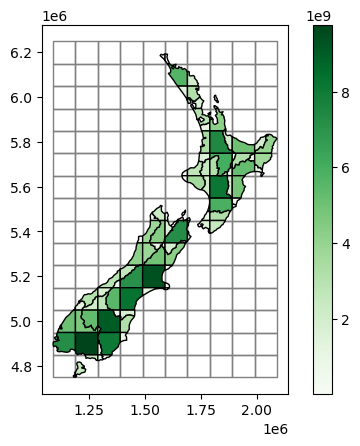

In [30]:
ax = grid.plot(color='none', edgecolor='grey')
nz_grid.plot(
    ax=ax, 
    column='area_sub', 
    edgecolor='k', 
    legend=True, 
    cmap='Greens'
);

In [31]:
nz_grid['area_prop'] = nz_grid['area_sub'] / nz_grid['area']
nz_grid['population'] = nz_grid['Population'] * nz_grid['area_prop']
nz_grid

,id,area,Population,geometry,area_sub,area_prop,population
0,64,1.289058e+10,175500.0,"POLYGON ((1586362.965 6168009.001, 1568216.708...",3.231015e+08,0.025065,4398.897141
1,80,1.289058e+10,175500.0,"POLYGON ((1590143 6162776.641, 1590143 6191701...",4.612641e+08,0.035783,6279.925114
2,81,1.289058e+10,175500.0,"POLYGON ((1633099.964 6066188.094, 1632333.259...",5.685656e+09,0.441071,77407.916241
3,82,1.289058e+10,175500.0,"POLYGON ((1688395.37 5989681.201, 1677965.696 ...",1.307476e+09,0.101429,17800.759095
4,97,1.289058e+10,175500.0,"POLYGON ((1698281.254 6113546.125, 1698221.399...",2.013006e+09,0.156161,27406.269178
...,...,...,...,...,...,...,...
105,87,1.046485e+10,46200.0,"MULTIPOLYGON (((1649908.695 5455398.241, 16565...",4.526248e+08,0.043252,1998.239223
106,88,1.046485e+10,46200.0,"POLYGON ((1679241.14 5359477.533, 1667754.211 ...",7.223641e+09,0.690277,31890.789070
107,89,1.046485e+10,46200.0,"POLYGON ((1641283.955 5341361.167, 1638347.722...",1.826943e+09,0.174579,8065.550415
108,103,1.046485e+10,46200.0,"POLYGON ((1690724.332 5458875.452, 1698889.134...",1.227037e+08,0.011725,541.709946


>Currently, each grid holds the entire population of each region instead of the proportion covered

>Sum and join the population in all parts of each grid

In [32]:
import pandas as pd 

In [33]:
nz_grid = nz_grid.groupby('id')['population'].sum().reset_index()
grid = pd.merge(grid, nz_grid[['id', 'population']], on='id', how='left')
grid

,geometry,id,population
0,"POLYGON ((1090143 6248536, 1190143 6248536, 11...",0,NaN
1,"POLYGON ((1090143 6148536, 1190143 6148536, 11...",1,NaN
2,"POLYGON ((1090143 6048536, 1190143 6048536, 11...",2,NaN
3,"POLYGON ((1090143 5948536, 1190143 5948536, 11...",3,NaN
4,"POLYGON ((1090143 5848536, 1190143 5848536, 11...",4,NaN
...,...,...,...
145,"POLYGON ((1990143 5248536, 2090143 5248536, 20...",154,NaN
146,"POLYGON ((1990143 5148536, 2090143 5148536, 20...",155,NaN
147,"POLYGON ((1990143 5048536, 2090143 5048536, 20...",156,NaN
148,"POLYGON ((1990143 4948536, 2090143 4948536, 20...",157,NaN


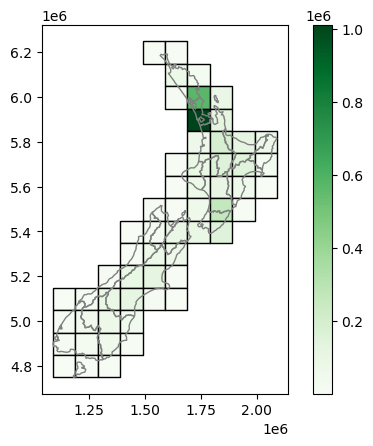

In [34]:
ax = grid.plot(
    column='population', 
    edgecolor='k', 
    legend=True, 
    cmap='Greens'
)
nz.plot(ax=ax, color='none', edgecolor='grey', legend=True);

In [35]:
nz.Population.sum(), grid.population.sum()

(4787200.0, 4787199.999999998)